In [136]:
pip install chembl_webresource_client

Note: you may need to restart the kernel to use updated packages.


In [138]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [140]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [310]:

selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL613837'

In [316]:

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [318]:
df = pd.DataFrame.from_dict(res)

In [320]:
df
     

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,22804102,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4712028,Antiviral activity against HCoV-229E infected ...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,1.7
1,None,None,24984054,"[{'comments': None, 'relation': '<=', 'result_...",CHEMBL5227023,Antiviral activity against recombinant HCoV-22...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,0.7
2,None,None,24992649,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,3.35
3,None,None,24992650,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,nM,UO_0000065,None,1.48
4,None,None,24992680,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5230463,Antiviral activity against HCoV-229E assessed ...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,5.1
5,None,None,25080001,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255429,Antiviral activity against HCoV-229E harboring...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,18.1


In [322]:
df.to_csv('bioactivity_data_raw.csv', index=False)

In [152]:
df=pd.read_csv('bioactivity_data_raw.csv')
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,22804102,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4712028,Antiviral activity against HCoV-229E infected ...,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,uM,UO_0000065,NaN,1.70
1,NaN,NaN,24984054,"[{'comments': None, 'relation': '<=', 'result_...",CHEMBL5227023,Antiviral activity against recombinant HCoV-22...,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,uM,UO_0000065,NaN,0.70
2,NaN,NaN,24992649,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,uM,UO_0000065,NaN,3.35
3,NaN,NaN,24992650,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,nM,UO_0000065,NaN,1.48
4,NaN,NaN,24992680,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5230463,Antiviral activity against HCoV-229E assessed ...,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,uM,UO_0000065,NaN,5.10
5,NaN,NaN,25080001,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255429,Antiviral activity against HCoV-229E harboring...,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,uM,UO_0000065,NaN,18.10


In [154]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,22804102,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4712028,Antiviral activity against HCoV-229E infected ...,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,uM,UO_0000065,NaN,1.70
1,NaN,NaN,24984054,"[{'comments': None, 'relation': '<=', 'result_...",CHEMBL5227023,Antiviral activity against recombinant HCoV-22...,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,uM,UO_0000065,NaN,0.70
2,NaN,NaN,24992649,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,uM,UO_0000065,NaN,3.35
3,NaN,NaN,24992650,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,nM,UO_0000065,NaN,1.48
4,NaN,NaN,24992680,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5230463,Antiviral activity against HCoV-229E assessed ...,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,uM,UO_0000065,NaN,5.10
5,NaN,NaN,25080001,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255429,Antiviral activity against HCoV-229E harboring...,F,NaN,NaN,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,NaN,NaN,IC50,uM,UO_0000065,NaN,18.10


In [324]:

bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")

In [326]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,1700.00
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,700.00
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,3350.00
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,1.48
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,5100.00
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,18100.00


In [160]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,1700.00,active
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,700.00,active
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,3350.00,inactive
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,1.48,NaN
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,5100.00,NaN
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,18100.00,NaN


In [162]:

df4.to_csv('bioactivity_data_preprocessed.csv', index=False)
     

Exploratory Data Analysis

In [166]:
import pandas as pd

In [168]:

df = pd.read_csv('bioactivity_data_preprocessed.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,1700.00,active
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,700.00,active
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,3350.00,inactive
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,1.48,NaN
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,5100.00,NaN
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,18100.00,NaN


In [170]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [188]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [174]:
  import sys
  print(sys.executable)

C:\Users\91981\anaconda3\python.exe


In [176]:
   !conda install -c conda-forge rdkit -y
   

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [178]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [180]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski
     

,MW,LogP,NumHDonors,NumHAcceptors
0,796.992,1.0006,10.0,14.0
1,507.428,4.3004,2.0,3.0
2,4331.996,-9.9754,59.0,60.0
3,574.747,3.6599,2.0,5.0
4,542.036,3.9395,1.0,10.0
5,430.585,5.7974,1.0,4.0


In [182]:

df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,toid,type,units,uo_units,upper_value,value,MW,LogP,NumHDonors,NumHAcceptors
0,None,None,22804102,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4712028,Antiviral activity against HCoV-229E infected ...,F,None,None,BAO_0000190,...,None,IC50,uM,UO_0000065,None,1.7,796.992,1.0006,10.0,14.0
1,None,None,24984054,"[{'comments': None, 'relation': '<=', 'result_...",CHEMBL5227023,Antiviral activity against recombinant HCoV-22...,F,None,None,BAO_0000190,...,None,IC50,uM,UO_0000065,None,0.7,507.428,4.3004,2.0,3.0
2,None,None,24992649,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,None,None,BAO_0000190,...,None,IC50,uM,UO_0000065,None,3.35,4331.996,-9.9754,59.0,60.0
3,None,None,24992650,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,None,None,BAO_0000190,...,None,IC50,nM,UO_0000065,None,1.48,574.747,3.6599,2.0,5.0
4,None,None,24992680,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5230463,Antiviral activity against HCoV-229E assessed ...,F,None,None,BAO_0000190,...,None,IC50,uM,UO_0000065,None,5.1,542.036,3.9395,1.0,10.0
5,None,None,25080001,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255429,Antiviral activity against HCoV-229E harboring...,F,None,None,BAO_0000190,...,None,IC50,uM,UO_0000065,None,18.1,430.585,5.7974,1.0,4.0


In [384]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm',axis=1)
        
    return x

In [386]:

df_combined.standard_value.describe()

count        6.000000
mean      4825.246667
std       6760.539473
min          1.480000
25%        950.000000
50%       2525.000000
75%       4662.500000
max      18100.000000
Name: standard_value, dtype: float64

In [388]:
-np.log10( (10**-9)* 100000000 )
     

1.0

In [390]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [392]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis=1)
        
    return x

In [394]:
df_norm = norm_value(df_combined)
df_norm
     

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,active,796.992,1.0006,10.0,14.0,1700.00
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,active,507.428,4.3004,2.0,3.0,700.00
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,inactive,4331.996,-9.9754,59.0,60.0,3350.00
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,NaN,574.747,3.6599,2.0,5.0,1.48
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,NaN,542.036,3.9395,1.0,10.0,5100.00
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,NaN,430.585,5.7974,1.0,4.0,18100.00


In [396]:
df_norm.standard_value_norm.describe()

count        6.000000
mean      4825.246667
std       6760.539473
min          1.480000
25%        950.000000
50%       2525.000000
75%       4662.500000
max      18100.000000
Name: standard_value_norm, dtype: float64

In [398]:
df_final = pIC50(df_norm)
df_final
     

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,active,796.992,1.0006,10.0,14.0,5.769551
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,active,507.428,4.3004,2.0,3.0,6.154902
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,inactive,4331.996,-9.9754,59.0,60.0,5.474955
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,NaN,574.747,3.6599,2.0,5.0,8.829738
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,NaN,542.036,3.9395,1.0,10.0,5.292430
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,NaN,430.585,5.7974,1.0,4.0,4.742321


In [400]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class
     

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,active,796.992,1.0006,10.0,14.0,5.769551
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,active,507.428,4.3004,2.0,3.0,6.154902
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,inactive,4331.996,-9.9754,59.0,60.0,5.474955
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,NaN,574.747,3.6599,2.0,5.0,8.829738
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,NaN,542.036,3.9395,1.0,10.0,5.292430
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,NaN,430.585,5.7974,1.0,4.0,4.742321


In [402]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

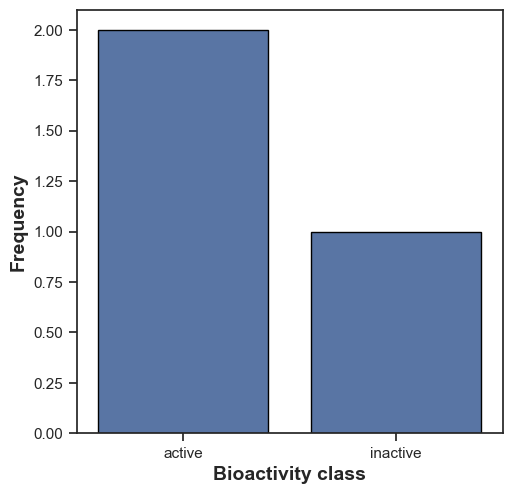

In [404]:

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

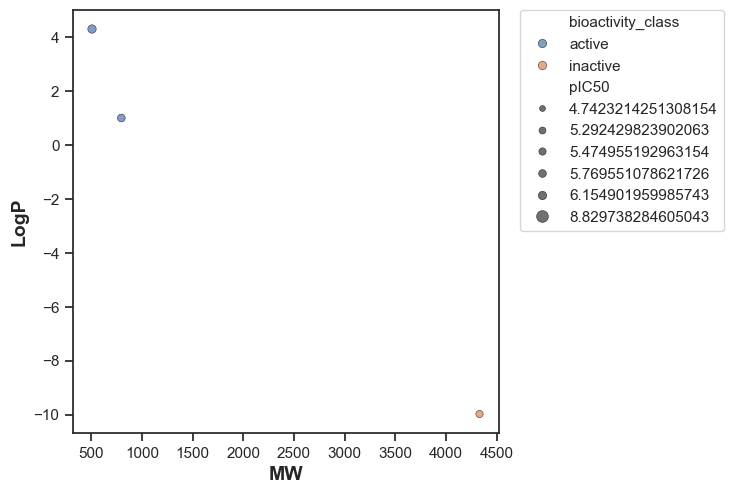

In [406]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

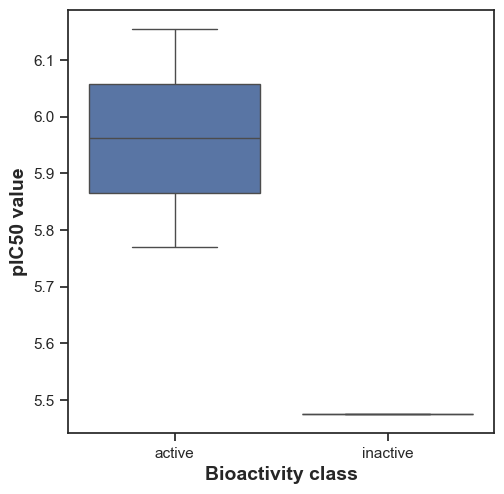

In [408]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [410]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [412]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,2.0,0.666667,0.05,Same distribution (fail to reject H0)


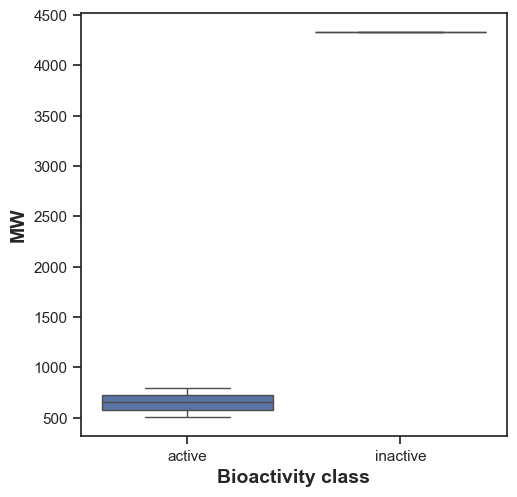

In [414]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')
     

In [416]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,0.0,0.666667,0.05,Same distribution (fail to reject H0)


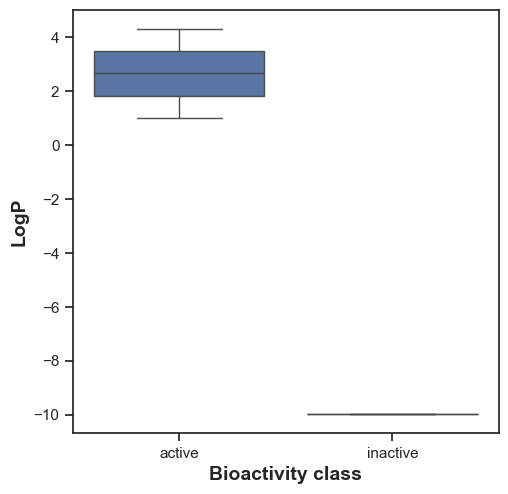

In [418]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [420]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2.0,0.666667,0.05,Same distribution (fail to reject H0)


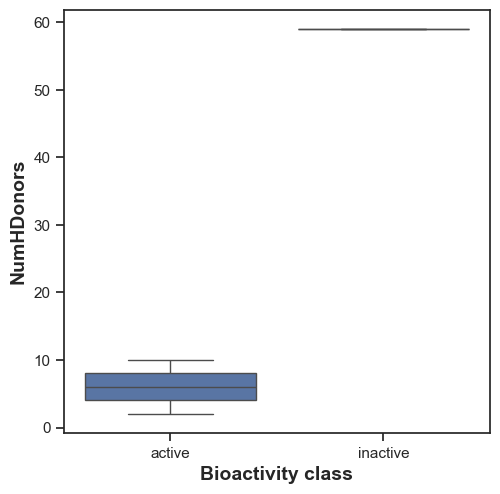

In [422]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [424]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,0.0,0.666667,0.05,Same distribution (fail to reject H0)


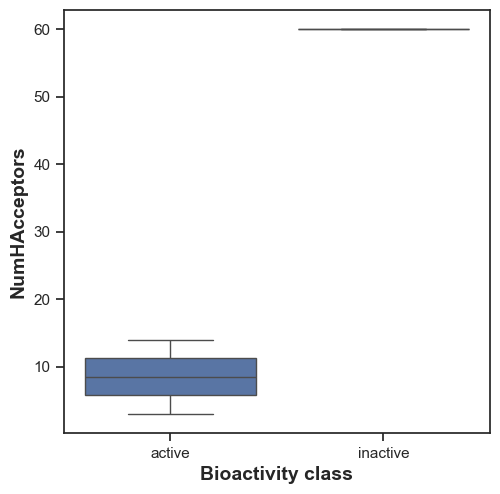

In [426]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [428]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,0.0,0.666667,0.05,Same distribution (fail to reject H0)
